In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
daily_returns = pd.read_excel("daily_returns.xlsx")
daily_returns['Date']  = pd.to_datetime(daily_returns["Date"])
daily_returns = daily_returns.set_index('Date')
daily_returns.describe()

,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,HINDUNILVR,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,0.029856,0.072911,0.114615,0.007218,0.030647,0.080559,0.145516,0.144467,0.080979,0.003023,...,0.116470,0.096739,0.088562,0.170402,0.137747,0.056869,0.177506,0.081271,0.018167,0.178356
std,1.154501,1.109959,1.434597,1.243185,1.504596,1.439688,1.540097,1.726995,1.268610,1.148318,...,1.790287,1.470166,1.301380,2.252128,1.265147,1.776723,2.248385,1.306813,1.621008,2.204728
min,-8.435800,-7.633600,-14.404000,-4.219100,-9.422700,-8.839400,-12.890700,-6.614300,-4.129600,-7.400400,...,-12.421700,-12.674600,-5.269800,-21.149700,-6.570300,-6.027300,-15.398300,-7.180500,-8.509200,-14.774800
25%,-0.538200,-0.494300,-0.641750,-0.657450,-0.808800,-0.682600,-0.690650,-0.860350,-0.646950,-0.589050,...,-0.783600,-0.651400,-0.716000,-0.825700,-0.570250,-0.966750,-1.003450,-0.646800,-0.827050,-0.845150
50%,0.058200,0.050800,0.099800,-0.057000,-0.016100,0.024300,0.116900,0.127800,-0.013100,-0.019900,...,0.144300,0.057300,0.062200,0.069200,0.053600,-0.012700,0.028200,0.030100,-0.023600,0.098600
75%,0.640350,0.619100,0.812050,0.629550,0.739200,0.788250,0.852000,1.101450,0.710950,0.611050,...,1.104750,0.836000,0.772500,1.059000,0.802900,0.950050,1.300250,0.816550,0.800200,1.187150
max,4.628700,4.716100,9.068500,6.632800,7.934000,7.710000,6.720400,6.531500,8.750800,5.959500,...,7.118100,6.277200,6.799800,15.301900,4.502600,10.219200,12.808900,6.715500,11.467400,18.863300


In [3]:
correlation_matrix = daily_returns.corr()
abs_correlation_matrix = correlation_matrix.abs()

In [4]:
abs_correlation_matrix

,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,HINDUNILVR,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
HDFCBANK,1.000000,0.442166,0.354503,0.134624,0.187362,0.135354,0.190262,0.301233,0.183162,0.097696,...,0.272009,0.335537,0.325016,0.330891,0.228334,0.210077,0.236147,0.172583,0.085035,0.156020
ICICIBANK,0.442166,1.000000,0.433852,0.181925,0.217176,0.169792,0.191910,0.309102,0.202876,0.066014,...,0.236370,0.336296,0.348369,0.339775,0.315037,0.208554,0.203394,0.154583,0.049896,0.149810
SBIN,0.354503,0.433852,1.000000,0.188948,0.154046,0.182711,0.192694,0.299909,0.237000,0.020666,...,0.315305,0.454638,0.362266,0.496380,0.244054,0.277067,0.372788,0.227805,0.065242,0.260098
TCS,0.134624,0.181925,0.188948,1.000000,0.698949,0.650787,0.113396,0.219677,0.158746,0.176033,...,0.210470,0.249293,0.197198,0.151651,0.216806,0.181545,0.109536,0.181426,0.085956,0.136598
INFY,0.187362,0.217176,0.154046,0.698949,1.000000,0.672169,0.114237,0.261979,0.136105,0.178341,...,0.220876,0.233953,0.198448,0.148992,0.247369,0.182252,0.114989,0.198148,0.057502,0.149599
HCLTECH,0.135354,0.169792,0.182711,0.650787,0.672169,1.000000,0.189090,0.203600,0.174924,0.182383,...,0.260132,0.266169,0.219136,0.162177,0.261235,0.200927,0.112562,0.219701,0.103735,0.185227
BAJAJ-AUTO,0.190262,0.191910,0.192694,0.113396,0.114237,0.189090,1.000000,0.355140,0.369367,0.151628,...,0.241431,0.233521,0.278735,0.241866,0.274561,0.277848,0.179219,0.246244,0.132394,0.272489
M&M,0.301233,0.309102,0.299909,0.219677,0.261979,0.203600,0.355140,1.000000,0.399172,0.172657,...,0.264057,0.262873,0.369842,0.306375,0.293938,0.226681,0.236415,0.302031,0.181244,0.297385
MARUTI,0.183162,0.202876,0.237000,0.158746,0.136105,0.174924,0.369367,0.399172,1.000000,0.194905,...,0.231859,0.250852,0.296284,0.251301,0.283472,0.222507,0.213489,0.286256,0.234346,0.199180
HINDUNILVR,0.097696,0.066014,0.020666,0.176033,0.178341,0.182383,0.151628,0.172657,0.194905,1.000000,...,0.032197,0.025325,0.183746,0.045858,0.112278,0.082969,0.031470,0.195535,0.221746,0.106928


In [5]:
sectors = pd.read_excel('stock_categories.xlsx')
sectors = sectors.set_index('Symbol')
sectors.describe()

,Category,Company Name
count,30,30
unique,10,30
top,Banking & Finance,HDFC Bank
freq,3,1


# Calculating Betas and taking minimum beta stock in each sector

In [6]:
# Calculating Beta for each stock relative to its sector average(Whole market would be irrelavant, hence sector wise)
results = []
categories = sectors['Category'].unique()

for category in categories:
    stocks_in_category = sectors[sectors['Category'] == category].index.tolist()
    
    sector_market_returns = daily_returns[stocks_in_category].mean(axis=1)
    sector_market_std = sector_market_returns.std()
    
    min_beta = float('inf')
    min_beta_stock = None

    for stock in stocks_in_category:
        stock_returns = daily_returns[stock]
        
        # Correlation between stock and market
        correlation = stock_returns.corr(sector_market_returns)
        stock_std = stock_returns.std()
        
        # Beta = rho(market,stock)*std(stock)/std(market)
        if sector_market_std == 0:
            beta = np.nan
        else:
            beta = (correlation * stock_std) / sector_market_std
        
        if beta < min_beta:
            min_beta = beta
            min_beta_stock = stock
            
    results.append({
        'Category': category,
        'Stock': min_beta_stock,
        'Minimum Beta': min_beta
    })

In [7]:
min_beta_df = pd.DataFrame(results)
min_beta_df

,Category,Stock,Minimum Beta
0,Banking & Finance,HDFCBANK,0.897469
1,Information Tech,TCS,0.877324
2,Automobiles,MARUTI,0.798376
3,Consumer Goods,ITC,0.941464
4,Energy & Power,RELIANCE,0.734365
5,Pharmaceuticals,SUNPHARMA,0.865383
6,Metals & Mining,JSWSTEEL,0.885902
7,Construction/Infra,ULTRACEMCO,0.688196
8,Telecommunications,BHARTIARTL,0.593804
9,Retail/E-commerce,TITAN,0.667630


In [8]:
selected_stocks = min_beta_df['Stock'].unique().tolist()
selected_stocks_df = daily_returns[selected_stocks]
selected_stocks_df

,HDFCBANK,TCS,MARUTI,ITC,RELIANCE,SUNPHARMA,JSWSTEEL,ULTRACEMCO,BHARTIARTL,TITAN
Date,,,,,,,,,,
2023-02-02,-1.4869,1.5271,1.1552,4.7593,-0.5535,-0.7193,-0.3152,0.3676,1.1247,-1.6113
2023-02-03,3.4584,0.6329,0.8134,0.5415,0.0881,2.0395,0.6118,0.3007,1.9479,6.7155
2023-02-06,-0.4250,-0.6418,-0.3836,0.7225,-0.7535,-0.4669,-2.8421,-0.8617,-0.4603,-0.2071
2023-02-07,0.1483,0.3642,-1.6339,-2.6474,-0.2401,-1.6563,0.4289,-0.7780,-0.4245,-0.4516
2023-02-08,-0.0121,1.3693,0.8246,0.6162,1.9971,1.4115,2.4996,2.5248,-1.3742,0.8112
...,...,...,...,...,...,...,...,...,...,...
2026-01-23,-0.2830,0.3841,-1.8776,-0.4464,-1.1693,-0.1407,-1.2158,0.0404,-0.8740,0.0796
2026-01-27,1.1243,-0.1423,-1.4481,-1.4688,-0.4040,0.4289,4.4444,1.7786,-0.5694,-0.6166
2026-01-28,0.6801,1.3331,-2.4139,0.7846,1.1735,-1.7268,-0.2701,1.4139,-0.7956,-0.5454


In [9]:
selected_stocks_corr = selected_stocks_df.corr()
selected_stocks_abs_corr = selected_stocks_corr.abs()
selected_stocks_abs_corr

,HDFCBANK,TCS,MARUTI,ITC,RELIANCE,SUNPHARMA,JSWSTEEL,ULTRACEMCO,BHARTIARTL,TITAN
HDFCBANK,1.000000,0.134624,0.183162,0.139724,0.363864,0.116217,0.353118,0.325016,0.228334,0.172583
TCS,0.134624,1.000000,0.158746,0.148840,0.277337,0.156235,0.222907,0.197198,0.216806,0.181426
MARUTI,0.183162,0.158746,1.000000,0.218140,0.308007,0.193095,0.314078,0.296284,0.283472,0.286256
ITC,0.139724,0.148840,0.218140,1.000000,0.294160,0.157560,0.199113,0.183989,0.189751,0.228818
RELIANCE,0.363864,0.277337,0.308007,0.294160,1.000000,0.252777,0.401613,0.376218,0.334731,0.258038
SUNPHARMA,0.116217,0.156235,0.193095,0.157560,0.252777,1.000000,0.236653,0.229969,0.264909,0.214980
JSWSTEEL,0.353118,0.222907,0.314078,0.199113,0.401613,0.236653,1.000000,0.467165,0.317395,0.291664
ULTRACEMCO,0.325016,0.197198,0.296284,0.183989,0.376218,0.229969,0.467165,1.000000,0.256424,0.288199
BHARTIARTL,0.228334,0.216806,0.283472,0.189751,0.334731,0.264909,0.317395,0.256424,1.000000,0.264546
TITAN,0.172583,0.181426,0.286256,0.228818,0.258038,0.214980,0.291664,0.288199,0.264546,1.000000


# Hierarchical Clustering

In [ ]:
# Ward linkage minimizes the variance of the clusters being merged
# Euclidean distance on correlations
# Distance = 1 - abs(correlation)
distance_matrix = 1 - correlation_matrix.abs()

# Hierarchical clustering linkage
Z = linkage(distance_matrix, method='ward')

C:\Users\kiran\AppData\Local\Temp\ipykernel_26720\2236748273.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


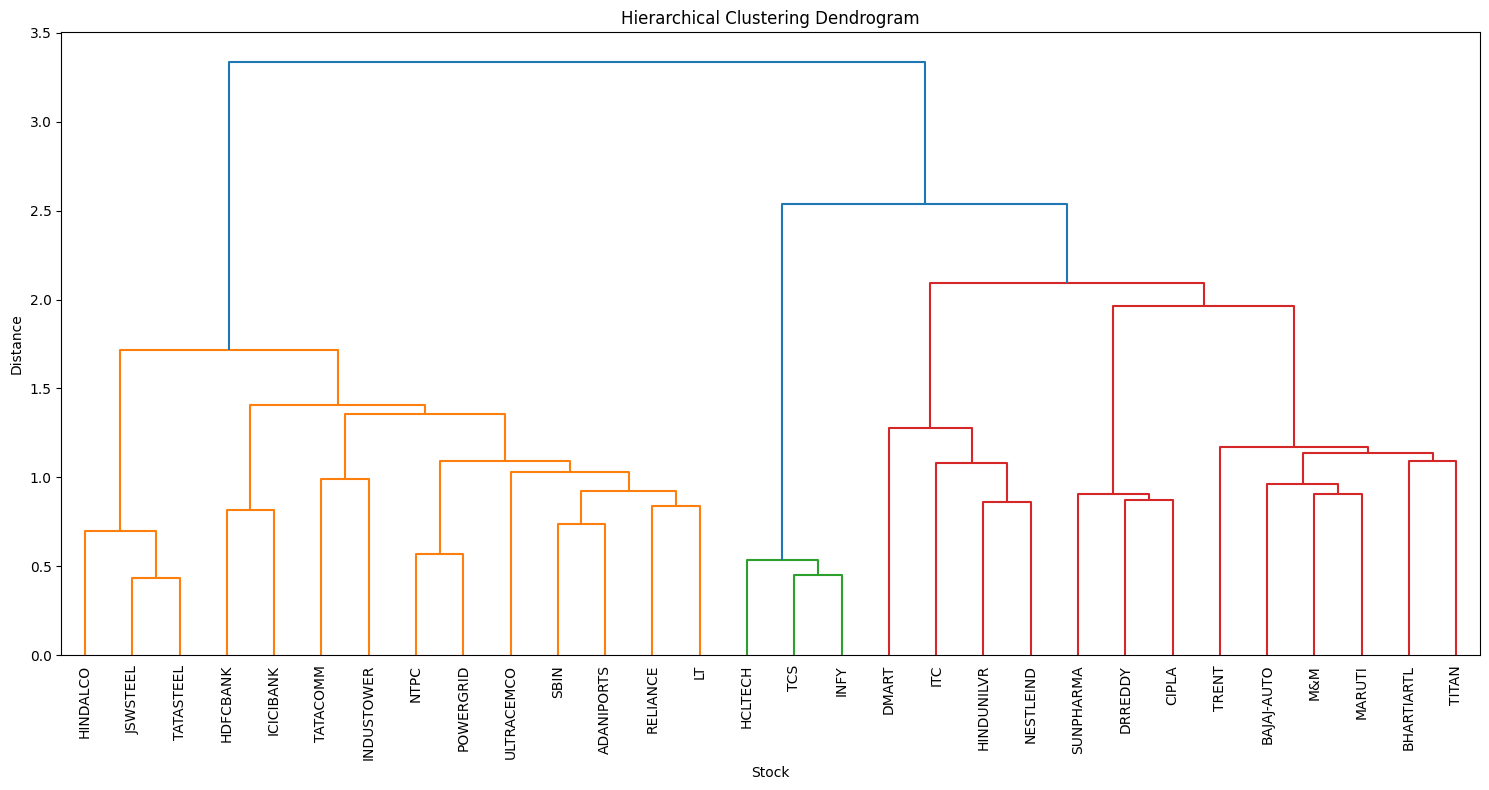

In [11]:
# Dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stock')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=correlation_matrix.columns,
    leaf_rotation=90.,
    leaf_font_size=10.,
)
plt.tight_layout()
plt.show()

In [ ]:
# 10 clusters
k = 10
clusters_indices = fcluster(Z, k, criterion='maxclust')

clustered_stocks = {}
for stock, cluster_id in zip(correlation_matrix.columns, clusters_indices):
    if cluster_id not in clustered_stocks:
        clustered_stocks[cluster_id] = []
    clustered_stocks[cluster_id].append(stock)

for i in sorted(clustered_stocks.keys()):
    print(f"Cluster {i}: {clustered_stocks[i]}")

Cluster 1: ['JSWSTEEL', 'TATASTEEL', 'HINDALCO']
Cluster 2: ['HDFCBANK', 'ICICIBANK']
Cluster 3: ['TATACOMM', 'INDUSTOWER']
Cluster 4: ['SBIN', 'RELIANCE', 'NTPC', 'POWERGRID', 'LT', 'ULTRACEMCO', 'ADANIPORTS']
Cluster 5: ['TCS', 'INFY', 'HCLTECH']
Cluster 6: ['HINDUNILVR', 'ITC', 'NESTLEIND']
Cluster 7: ['DMART']
Cluster 8: ['SUNPHARMA', 'DRREDDY', 'CIPLA']
Cluster 9: ['BAJAJ-AUTO', 'M&M', 'MARUTI', 'BHARTIARTL', 'TITAN']
Cluster 10: ['TRENT']


- More importance on the Retail/E-commerce sector is observed, as there are varied trends in the market  
- Construction/Infra sector and Energy & Power sector are closely related as they are in the same cluster